# Principal Component Analysis (PCA) and Clustering
By: Vikram Mathur


# Problem Statement
- Identifying at least 5 countries in direct need of aid for utilization of $ 10 million funding available with HELP International NGO.
- Objective is to determine the overall development of the countries based on socio-economic and health factors to take this decision.


# Table Of Contents<br/>

[Loading Required Libraries](#SetupEnvironment)<br/><br/>
1. [**Step 1: Reading and Understanding Data**](#RUD)<br/>


2. [**Step 2: Cleaning The Data**](#CD)<br/>
    2.1 [Checking Missing Values](#CNV)<br/>


3. [**Step 3: Data Preparation & EDA**](#DP)<br/>
    3.1 [Handling Percentage Formats](#HPF)<br/>
    3.2 [Outlier Identification & Treatment](#OIT)<br/>
    3.3 [Correlation of Variables](#CV)<br/>


4. [**Step 4: Principal Component Analysis**](#PCA)<br/>
    4.1 [Scaling](#S)<br/>
    4.2 [Applying PCA](#AP)<br/>
    4.3 [Plotting Principal Components](#PPC)<br/>
    4.4 [Scree Plot](#SP)<br/>
    4.5 [Incremental PCA](#IPCA)<br/>
    > 4.5.1 [Correlation Matrix of Principal Components](#CMPC)<br/>
    
    4.6 [Outlier Analysis on Principal Components](#OAPC)<br/>


5. [**Step 5: Clustering**](#MC)<br/>
    5.1 [Hopkin Statistic](#HS)<br/>
    5.2 [SSD](#SSD)<br/>
    5.3 [Silhouette Score](#SS)<br/>
    5.3 [KMeans Clustering](#KC)<br/>
    5.5 [Hierarchical Clustering](#HC)<br/>
    

5. [**Step 6: Analysis of the Clusters**](#AC)<br/>
    6.1 [Analyzing Features in Clusters](#AFC)<br/>
    6.2 [Feature Means in Cluster](#FMC)<br/>
    6.3 [List of Countries in Dire-Need of Aid](#CDNA)<br/>

<a id="SetupEnvironment"></a>
# Loading Required Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

<a id="RUD"></a>
# 1. Reading and Understanding Data

In [2]:
df_countries = pd.read_csv("country-data.csv")
df_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df_countries.shape

(167, 10)

In [4]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [5]:
df_countries.describe([0,0.05, 0.25,0.50,0.75,0.90,0.95,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
0%,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
5%,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000


  Data Interpretation for dataframe describe  
-  The dataset does have values above 95th perentile, however the data seems to be valid entries.
- Will plot boxplot to determine if outliers need to be treated.

<a id="CD"></a>
# 2. Cleaning the Data

<a id="CNV"></a>
### 2.1 Checking Missing Values and Treating

In [6]:
# missing values
(df_countries.isnull().sum()/len(df_countries)) * 100

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

  Data Interpretation for Null Values  
- There are no missing values in the dataset

<a id="DP"></a>
# 3. Data Preparation

<a id="HPF"></a>
### 3.1 Handling Percentage Formats

**Assumption**: Based on confirmation by TA on the discussion forum since Total GDP is not available in the dataset, we are considering "gdpp" for calculation in this assignment.

In [7]:
df_countries['exports'] = df_countries['exports']*df_countries['gdpp']/100
df_countries['imports'] = df_countries['imports']*df_countries['gdpp']/100
df_countries['health'] = df_countries['health']*df_countries['gdpp']/100

In [8]:
df_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


<a id="OIT"></a>
### 3.2 Outlier Identification & Treatment

In [9]:
numerical_features = list(df_countries.drop('country',axis=1).columns)
numerical_features

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

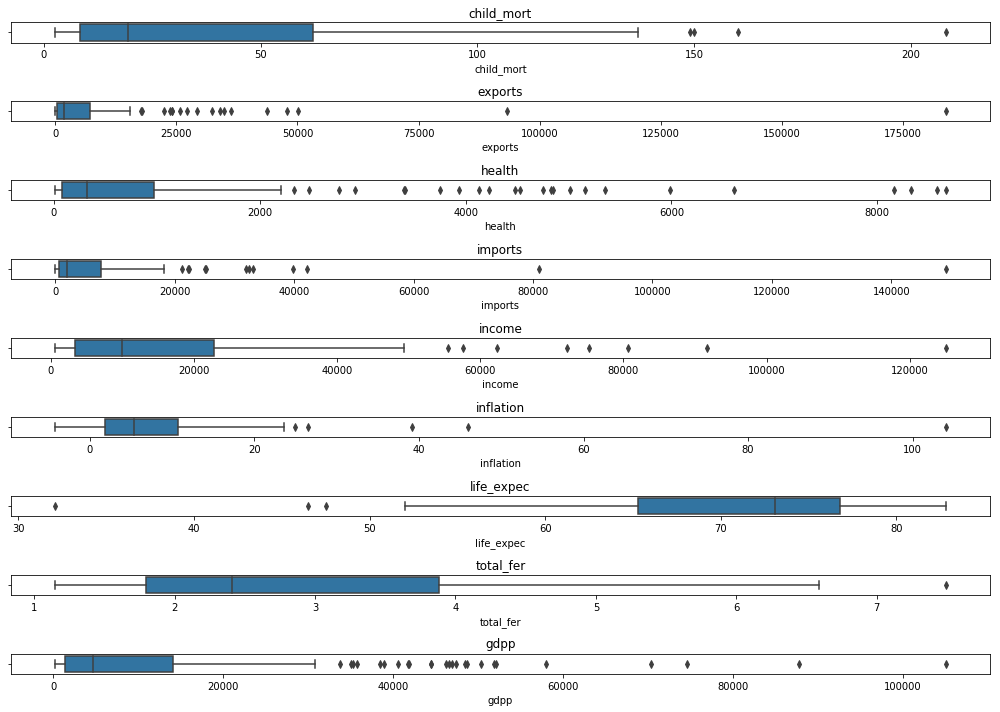

In [10]:
# Generic function to plot outliers based on dataframe and numeric columns
def check_outliers_continuous(df, cols):
    f, ax = plt.subplots(nrows=len(cols), figsize=(14,len(cols)+1))
    for i in range(0,len(cols)):
        sns.boxplot(df[cols[i]].dropna(), ax=ax[i])
        ax[i].title.set_text(cols[i])
    plt.tight_layout()
    plt.show()
    
check_outliers_continuous(df_countries, numerical_features)

  Data Interpretation of Correlation of Independent Variables  
- The data does have values outside the 75th and even 85th percentile but the data seems all valid and logical.
- Most of the outliers seems to be for developed countries having very high gdpp and income and hence treating the outliers will not remove the countries that are under-developed and require aid.
- Treat the outliers by removing data below 5th percentile and beyond 95th percentile

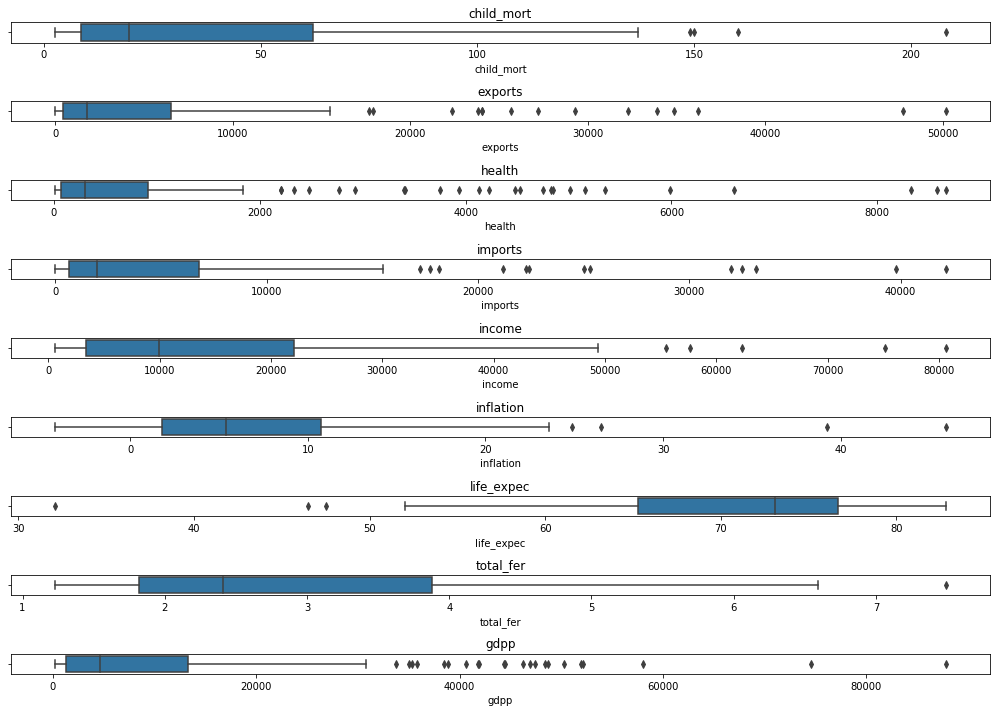

In [11]:
# procedure to remove outliers. 
def remove_outliers(df, cols):
    for col in cols:
        q1, q3 = np.percentile(df[col], [5, 95])
        iqr = q3 - q1
        lower_bound = q1 - (iqr * 1.5)
        upper_bound = q3 + (iqr * 1.5)
        df = df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]
    return df

df_countries = remove_outliers(df_countries, numerical_features)
check_outliers_continuous(df_countries, numerical_features)

In [12]:
df_countries.reset_index(drop=True,inplace=True)
df_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [13]:
df_countries.shape

(163, 10)

  Data Intepretation post Outlier Treatment  
- 4 rows removed from the dataset as a result of outlier treatment
- From the box plots it is visible that the outlier for highly developed countries was removed. Based on our business problem that does not impact any under-developed country being removed from the dataset.

<a id="CV"></a>
### 3.3 Correlation of Variables

<Figure size 1440x1440 with 0 Axes>

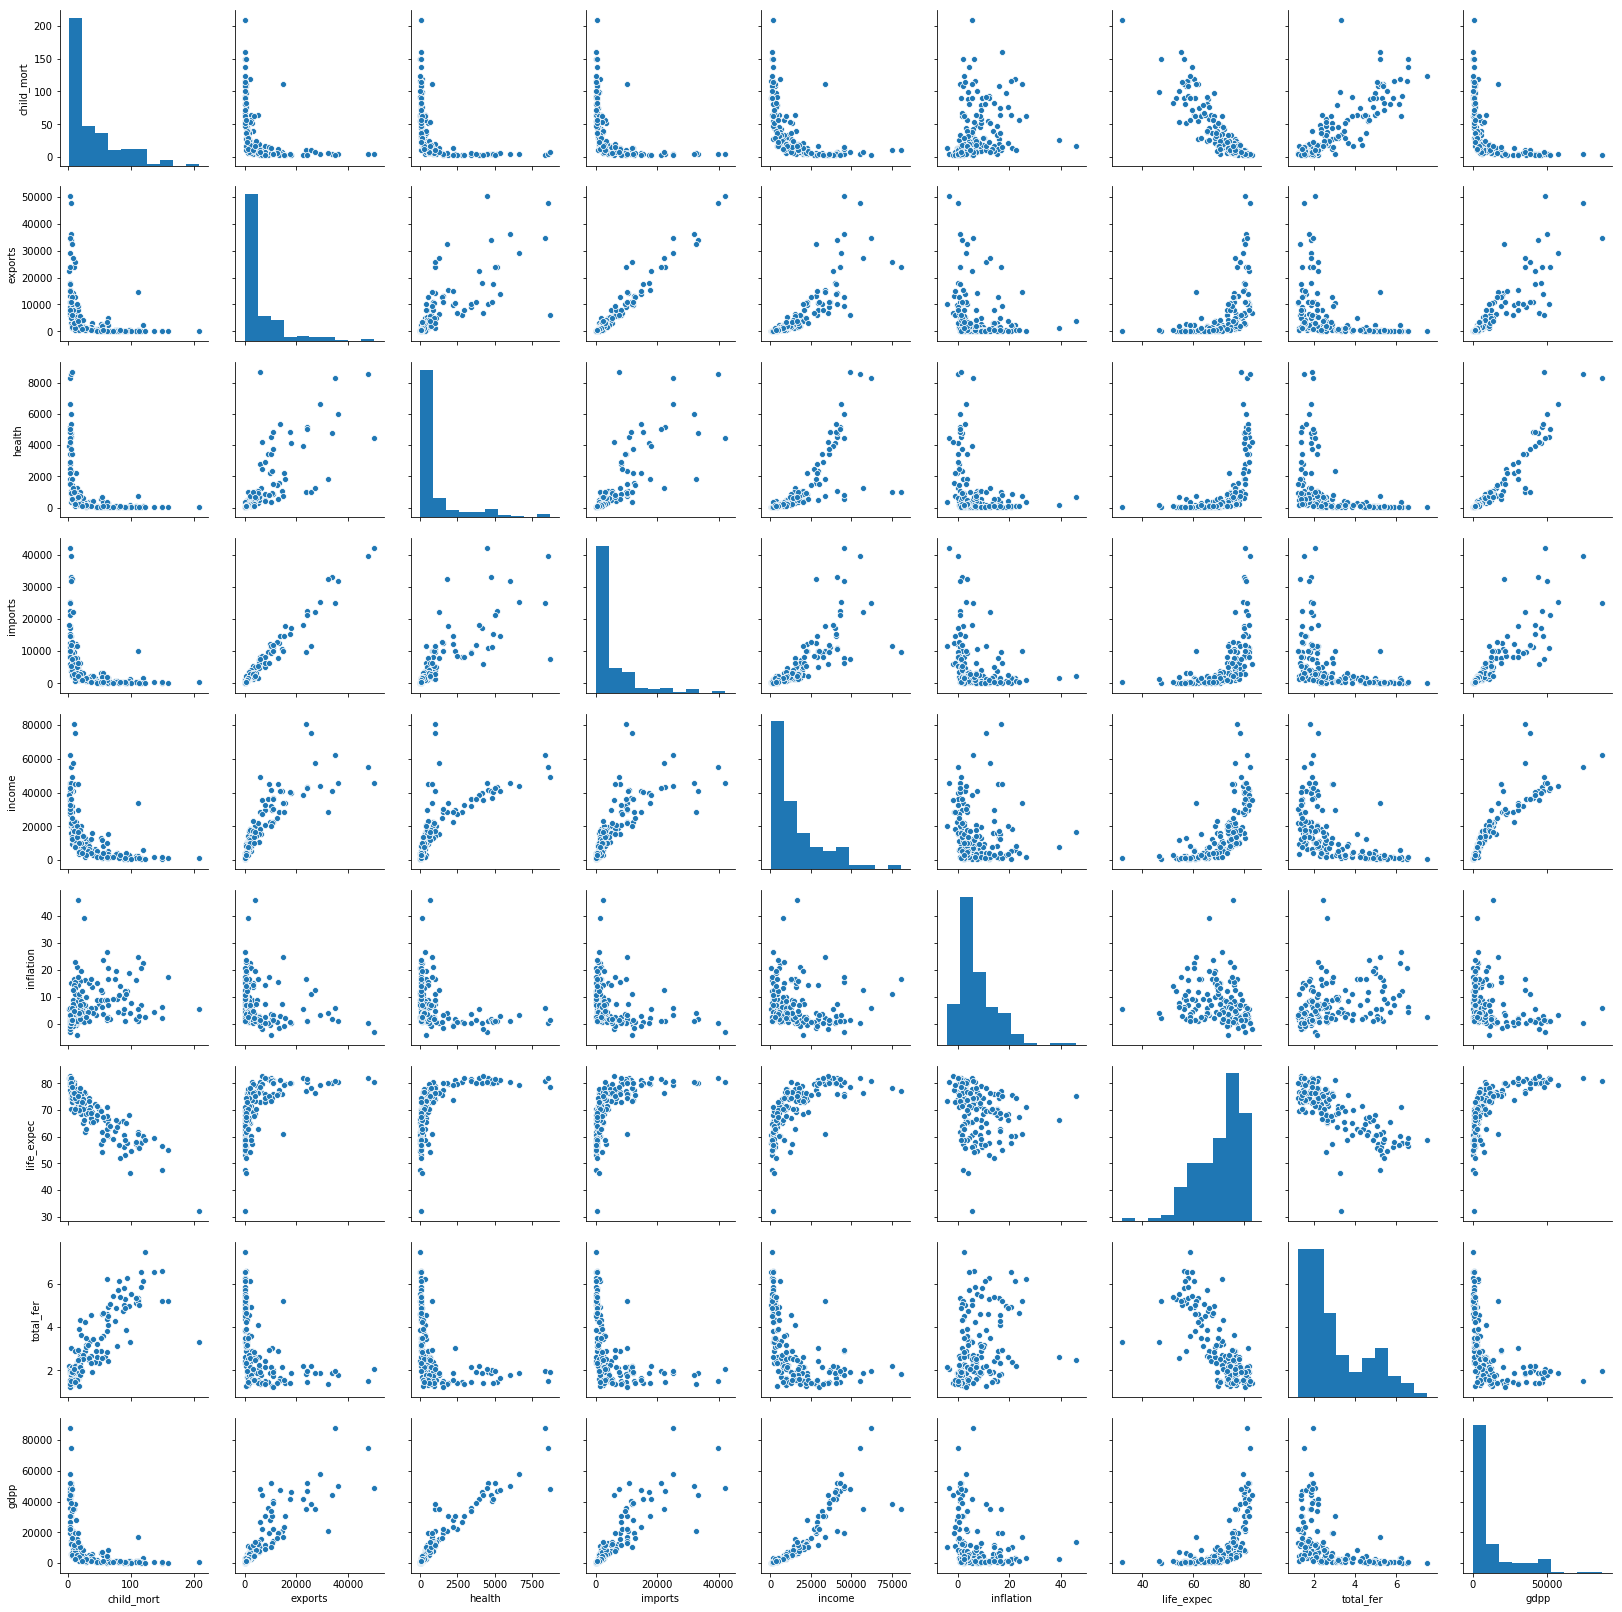

In [14]:
# Plotting pair plot to view correlation for numerical features
plt.figure(figsize=(20,20))
sns.pairplot(df_countries[numerical_features])
plt.show()

  Data Interpretation of Correlation of Variables  
- (exports and imports)
- (health and gdp)
- (income and gdpp)
- (exports and gdpp)
- (imports and gdpp)
- (child_mort and life_expec)
- (child_mort and total_fer) 

seems to have high correlation

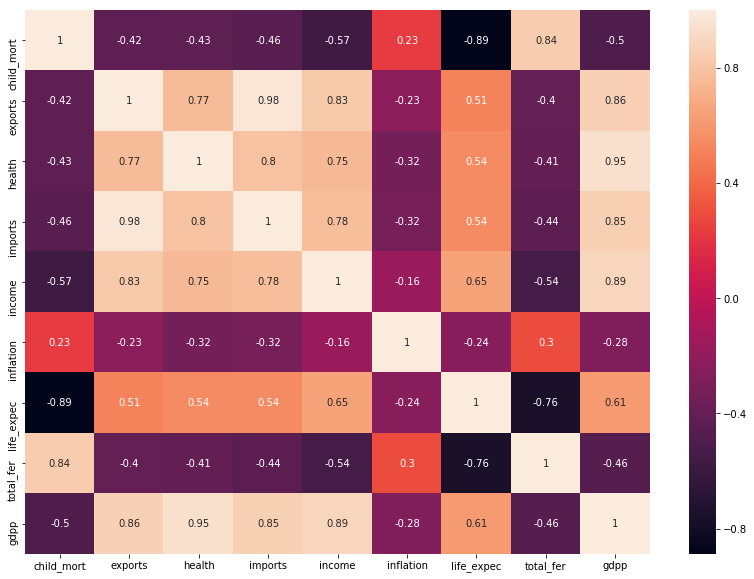

In [15]:
#plotting a heat map to view correlation
plt.figure(figsize=(14,10))
sns.heatmap(df_countries[numerical_features].corr(),annot=True)
plt.show()

##### Top 6 Correlations of  Variables
- Writing a custom function that prints the top 6 positively and negatively correlated pairs. 

In [16]:
def topcorr(df,cols):
    df_corr = pd.DataFrame(round(df[cols].corr()*100).unstack().reset_index())
    df_corr.rename(columns={'level_0':'Feature_1','level_1':'Feature_2',0:'Correlation'}, inplace=True)
    df_corr = df_corr[df_corr['Feature_1'] != df_corr['Feature_2']]
    df_corr = df_corr[df_corr['Feature_1'] != 'price']
    df_corr = df_corr[df_corr['Feature_2'] != 'price']
    df_corr.drop_duplicates(subset='Correlation', inplace=True)
    print("TOP 6 HIGH POSITIVE CORRELATION %","\n")
    print(df_corr.sort_values(by='Correlation',ascending=False).head(6))
    print("\nTOP 6 HIGH NEGATIVE CORRELATION %","\n")
    print(df_corr.sort_values(by='Correlation',ascending=True).head(6))

topcorr(df_countries, numerical_features)

TOP 6 HIGH POSITIVE CORRELATION % 

     Feature_1  Feature_2  Correlation
12     exports    imports         98.0
26      health       gdpp         95.0
44      income       gdpp         89.0
17     exports       gdpp         86.0
35     imports       gdpp         85.0
7   child_mort  total_fer         84.0

TOP 6 HIGH NEGATIVE CORRELATION % 

     Feature_1   Feature_2  Correlation
6   child_mort  life_expec        -89.0
61  life_expec   total_fer        -76.0
4   child_mort      income        -57.0
43      income   total_fer        -54.0
8   child_mort        gdpp        -50.0
3   child_mort     imports        -46.0


  Data Interpretation on Top 5 correlations  
- (exports and imports), (health and gdp), (income and gdpp), (child_mort and life_expec), (exports and gdpp), (imports and gdpp) and (child_mort and total_fer) have the highest correlation in the dataset
- None of the highly correlated features are not being removed as of now since we will be performing PCA.

<a id="PCA"></a>
# 4. Principal Component Analysis

<a id="S"></a>
### 4.1 Scaling

In [17]:
scaler = StandardScaler()
df_countries_scaled = pd.DataFrame(scaler.fit_transform(df_countries[numerical_features]))
df_countries_scaled.columns = numerical_features
df_countries_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.303466,-0.617617,-0.562023,-0.648685,-0.892037,0.289329,-1.612381,1.911315,-0.702455
1,-0.545781,-0.496897,-0.431204,-0.422310,-0.367608,-0.370665,0.666389,-0.870331,-0.483620
2,-0.276937,-0.434045,-0.478624,-0.498742,-0.180401,1.177320,0.689063,-0.043175,-0.460727
3,2.027084,-0.380154,-0.528049,-0.483915,-0.621628,2.017312,-1.170232,2.138116,-0.518267
4,-0.704073,-0.008898,-0.160414,0.254178,0.210399,-0.777327,0.723074,-0.550142,0.018150


<a id="APCA"></a>
### 4.2 Applying PCA

In [18]:
pca = PCA(svd_solver='randomized', random_state=42)
# Performing PCA on the scaled dataset
pca.fit(df_countries_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [19]:
# Checking the components
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8
0,-0.306984,0.363609,0.357650,0.369567,0.374096,-0.151673,0.334534,-0.291991,0.385917
1,0.516156,0.315771,0.261819,0.274173,0.120719,0.075542,-0.394480,0.504573,0.244261
2,-0.110024,0.066082,-0.068886,-0.034460,0.204132,0.960566,0.110050,0.002853,0.033461
3,0.022423,-0.494574,0.594689,-0.468355,0.034951,0.023836,0.160873,0.176516,0.350791
4,0.224249,-0.096058,0.051759,-0.177886,0.298764,0.031372,-0.583282,-0.681871,0.103696
5,0.052409,-0.023281,-0.430136,-0.299377,0.760914,-0.212411,0.129531,0.283344,0.029959
6,0.757271,-0.001873,-0.050909,0.033597,-0.049939,0.030816,0.579828,-0.285728,-0.039136
7,0.011192,-0.109339,0.468806,0.161262,0.341676,0.001917,0.009616,0.034025,-0.790025
8,0.010779,-0.705251,-0.187269,0.647535,0.122892,0.031275,-0.034514,0.030861,0.172942


In [20]:
# Find how much variance is explained by the principal components
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,0.639689
1,0.160728
2,0.102372
3,0.037556
4,0.025798
5,0.021367
6,0.009403
7,0.001871
8,0.001217


In [21]:
#Printing cummulative explained variance
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_))

,0
0,0.639689
1,0.800416
2,0.902788
3,0.940345
4,0.966142
5,0.987509
6,0.996912
7,0.998783
8,1.000000


  Data Interpretation of Explained Variance  
- The first principal component explains about 64%
- The next principal component explains about 16%. Cummulative: 64+16 = 80%
- The next principal component explains about 10%. Cummulative: 90%
- The next principal component explains about 4%. Cummulative: 94%

This will be visualized on a spree plot visually.

 <a id="PPC"></a>
 ### 4.3 Plotting the principal components
- Plotting original features on the first 2 principal components as axes (just for visualization purchase)

In [22]:
#Checking how the original variables are loaded on the principal components on a 2D surface
colnames = list(df_countries_scaled.columns)
df_countries_pca_2comp = pd.DataFrame({'Feature':colnames,'PC1':pca.components_[0], 'PC2':pca.components_[1]})
df_countries_pca_2comp

,Feature,PC1,PC2
0,child_mort,-0.306984,0.516156
1,exports,0.363609,0.315771
2,health,0.357650,0.261819
3,imports,0.369567,0.274173
4,income,0.374096,0.120719
5,inflation,-0.151673,0.075542
6,life_expec,0.334534,-0.394480
7,total_fer,-0.291991,0.504573
8,gdpp,0.385917,0.244261


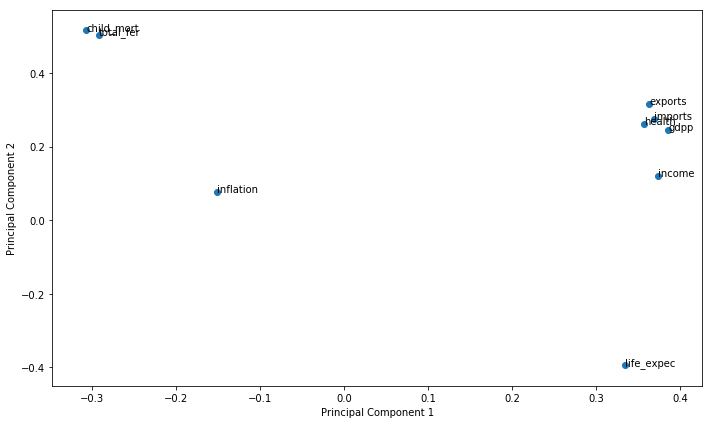

In [23]:
# Plotting PC1 and PC2 to visualise how these features are loaded
fig = plt.figure(figsize = (10,6))
plt.scatter(df_countries_pca_2comp.PC1, df_countries_pca_2comp.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(df_countries_pca_2comp.Feature):
    plt.annotate(txt, (df_countries_pca_2comp.PC1[i],df_countries_pca_2comp.PC2[i]))
plt.tight_layout()
plt.show()

  Data Interpretation of 2 Principal Components Plot  
- The first component is where the income, gdpp, life_expec, imports, exports and health is heavy. These 6 components have the highest loading.
- The second component is where the child_mort, total_fer are heavy. These 2 components have the highest loading.

<a id="SP"></a>
### 4.4 Scree Plot

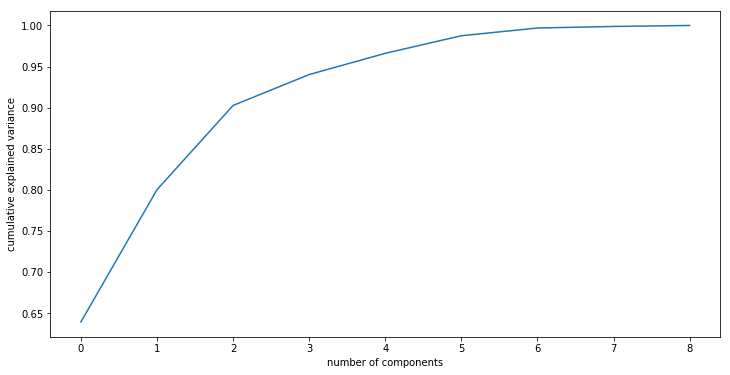

In [24]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (12,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

  Data Interpretation of Scree Plot  
- Around 80% variance is explained by 2 components
- Around 90% variance is explained by 3 components
- Around 94% variance is explained by 4 components

**Choosing 3 principal components for our model**

<a id="IPCA"></a>
### 4.4 Incremental PCA

In [25]:
#Using incremental PCA with 3 components
pca_final = IncrementalPCA(n_components=3)

#### Basis transformation 
- getting the data onto our PCs

In [26]:
df_countries_pca = pca_final.fit_transform(df_countries_scaled)
df_countries_pca.shape

(163, 3)

In [27]:
pd.DataFrame(df_countries_pca).head()

,0,1,2
0,-2.811422,1.494148,-0.220197
1,-0.114368,-1.559194,-0.307863
2,-0.608999,-0.883189,1.203482
3,-2.882428,2.144108,1.472741
4,0.855756,-0.929819,-0.539460


<a id="CMPC"></a>
#### 4.4.1 Creating correlation matrix for the principal components

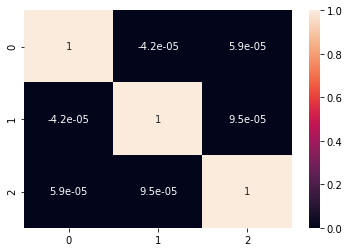

In [28]:
#creating correlation matrix for the principal components
sns.heatmap(pd.DataFrame(df_countries_pca).corr(),annot = True)

  Data Interpretation of correlation Matrix for PC  
- There is no correlation between these three components. They are orthogonal.
- We have effectively removed multicollinearity

<a id="OAPC"></a>
### 4.5 Outlier Analysis on Principal Components

In [29]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_countries_pca)
df_pc_3 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2]})
df_pc_3.head()

,PC1,PC2,PC3
0,-2.811422,1.494148,-0.220197
1,-0.114368,-1.559194,-0.307863
2,-0.608999,-0.883189,1.203482
3,-2.882428,2.144108,1.472741
4,0.855756,-0.929819,-0.539460


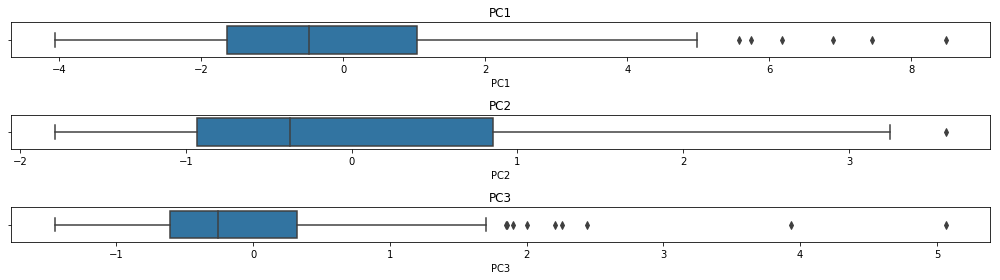

In [30]:
check_outliers_continuous(df_pc_3, df_pc_3.columns)

In [31]:
df_pc_3.describe([0,0.05, 0.25,0.50,0.75,0.90,0.95,0.99])

,PC1,PC2,PC3
count,1.630000e+02,1.630000e+02,1.630000e+02
mean,-3.269368e-17,-1.089789e-17,1.873076e-17
std,2.406810e+00,1.206416e+00,9.624909e-01
min,-4.058457e+00,-1.788296e+00,-1.447223e+00
0%,-4.058457e+00,-1.788296e+00,-1.447223e+00
5%,-2.929708e+00,-1.450880e+00,-1.107201e+00
25%,-1.631475e+00,-9.317494e-01,-6.099784e-01
50%,-4.815617e-01,-3.741109e-01,-2.545561e-01
75%,1.032454e+00,8.545156e-01,3.189740e-01
90%,3.689370e+00,1.620202e+00,1.246855e+00


  Data Interpretation on Outliers for Principal Components  
- Not removing any outliers on principal components. 
- Principal components do have outliers but the data does not seem to outlie significantly.
- They were earlier treated in the main dataset.

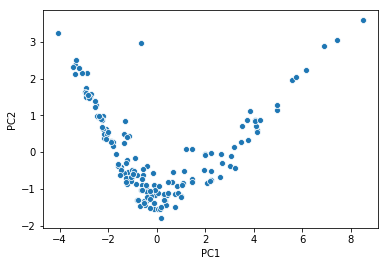

In [32]:
#Visualising two of the principcal components
sns.scatterplot(x='PC1',y='PC2',data=df_pc_3)

<a id="MC"></a>
# 5. Clustering

<a id="HS"></a>
### 5.1 Hopkins Statistic

In [33]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [34]:
#Let's check the Hopkins measure
hopkins(df_pc_3)

0.8458484787023426

  Data Interpretation for Hopkins measure  
 - Since the value is > 0.5 the given dataset has a good tendency to form clusters.

### Finding Optimal Number of Clusters
 - SSD
 - Silhouette Score

<a id="SSD"></a>
### 5.2 SSD

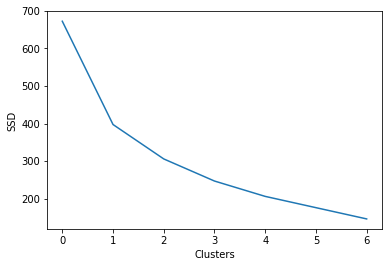

In [35]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_pc_3)
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.xlabel("Clusters")
plt.ylabel("SSD")
plt.show()

  Data Interpretation of SSD - Elbow Curve  
- Based on the elbow bend 2 or 3 clusters seem to suffice our need

<a id="SS"></a>
### 5.3 Silhouette Score

In [36]:
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_pc_3)
    silhouette_avg = silhouette_score(df_pc_3, kmeans.labels_)
    print(num_clusters, ":", silhouette_avg)

2 : 0.5129667408635467
3 : 0.45211575991088154
4 : 0.44383181704157626
5 : 0.4231208851471809
6 : 0.37890001782183336
7 : 0.3728357589515333
8 : 0.39456521206450734


  Data Interpretation of Silhouette Score  
- A Silhouette score of 0.51 is coming for 2 clusters and 0.45 for 3 clusters

**Choosing 2 clusters for our model based on both <u>SSD and Silhouette Score</u>**  

<a id="KC"></a>
### 5.4 KMeans Clustering

In [37]:
#deciding on k=2 clusters and infering if it's a correct decision or not.
kmeans = KMeans(n_clusters=2, max_iter=50)
kmeans.fit(df_pc_3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0])

In [39]:
# Appending cluster_id column to the dataset
df_pc_3['cluster_id'] = kmeans.labels_
df_pc_3.head(10)

,PC1,PC2,PC3,cluster_id
0,-2.811422,1.494148,-0.220197,0
1,-0.114368,-1.559194,-0.307863,0
2,-0.608999,-0.883189,1.203482,0
3,-2.882428,2.144108,1.472741,0
4,0.855756,-0.929819,-0.539460,0
5,-0.101066,-0.897123,1.901311,0
6,-0.481562,-1.451043,0.025733,0
7,3.765382,0.330355,-0.265942,1
8,4.978706,1.156923,-0.295363,1
9,-0.558203,-0.630075,0.832678,0


In [40]:
# Checking for counts of data between the 2 clusters
df_pc_3['cluster_id'].value_counts()

0    128
1     35
Name: cluster_id, dtype: int64

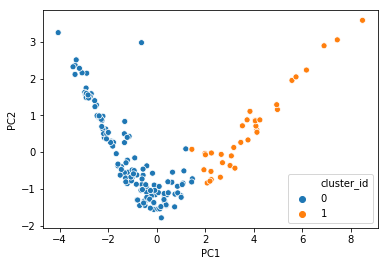

In [41]:
# Visualizing the plot for 2 principal components
sns.scatterplot(x='PC1',y='PC2',hue='cluster_id',legend='full',data=df_pc_3)

### 5.5 Hierarchical Clustering

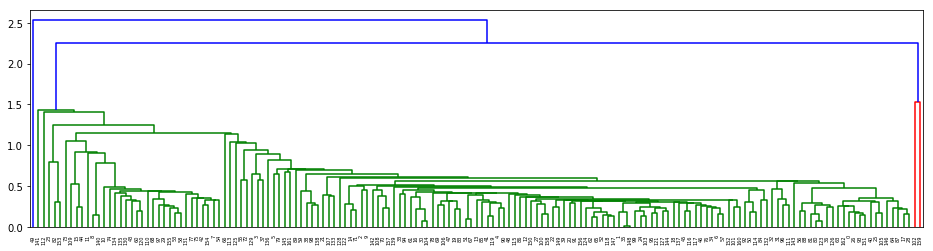

In [42]:
#single linkage - visualizing
mergings = linkage(df_pc_3, method='single', metric='euclidean')
plt.figure(figsize=(16,4))
dendrogram(mergings)
plt.show()

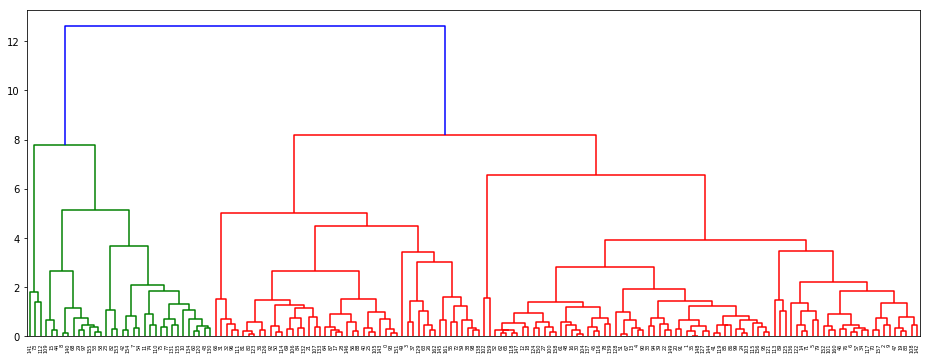

In [43]:
#complete linkage
mergings = linkage(df_pc_3, method='complete', metric='euclidean')
plt.figure(figsize=(16,6))
dendrogram(mergings)
plt.show()

  Data Interpretation of Hierarchical Clustering  
- Based on the complete linkage dendrogram, division into 3 or 4 clusters visually makes sense.
- From a four cluster business perspective it could possibly derive to:
    - Developed (High)
    - Developing (Upper-Middle)
    - Developing (Lower-Middle)
    - Under-Developed (Low)
- From a three cluster business perspective it could possibly derive to:
    - **Developed Countries**
    - **Developing Countries**
    - **Under-Developed Countries**
- Since our interest is to determine under-developed countries requiring direct aid there is not much benefit in dividing the developing countries into two separate clusters.
- Hence, selecting 3 clusters

In [44]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters = 3).reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2,
       2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 2,
       0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 0, 0])

In [45]:
df_pc_3['cluster_labels'] = cluster_labels
df_pc_3.sort_values(by='cluster_labels',ascending=False).head()

,PC1,PC2,PC3,cluster_id,cluster_labels
97,4.066702,0.848827,-0.024605,1,2
44,5.744492,2.044376,-0.018694,1,2
29,4.130136,0.601344,-0.114459,1,2
155,4.253805,0.875658,-0.414805,1,2
154,3.179470,0.125163,-0.299598,1,2


In [46]:
#Viewing the spread of data between the clusters
df_pc_3['cluster_labels'].value_counts()

1    80
0    49
2    34
Name: cluster_labels, dtype: int64

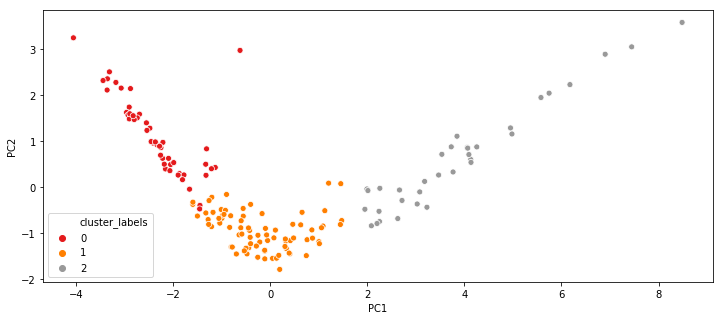

In [47]:
# Visualizing the plot for 2 principal components for three clusters
plt.figure(figsize=(12,5))
sns.scatterplot(x='PC1',y='PC2',hue='cluster_labels',palette="Set1",legend='full',data=df_pc_3)

In [48]:
#Merge the principal components and cluster_id dataset with the original dataset containing countries and orginal variables.
df_clustered = pd.merge(df_countries,df_pc_3, left_index=True, right_index=True)
df_clustered.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.811422,1.494148,-0.220197,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,-0.114368,-1.559194,-0.307863,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.608999,-0.883189,1.203482,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,-2.882428,2.144108,1.472741,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.855756,-0.929819,-0.539460,0,1


In [49]:
df_clustered.shape

(163, 15)

In [50]:
# Removing the Principal components columns we can map the cluster_id to the original features.
df_clustered=df_clustered.drop(['PC1','PC2','PC3'],axis=1)
df_clustered.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,1


<a id="AC"></a>
# 6 Analysis of the Cluster

<a id="AFC"></a>
### 6.1 Analyzing Features in Clusters
- Analyzing gdpp, child_mort and income in box plot with clusters

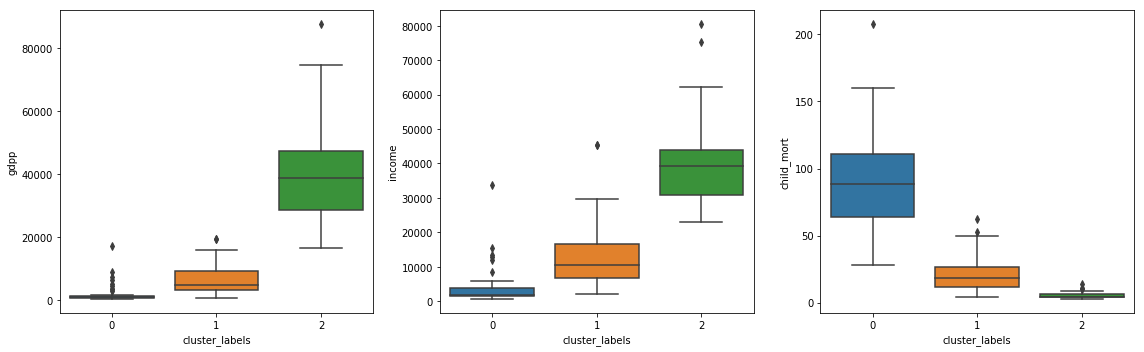

In [51]:
plt.figure(figsize=(16,5))
plt.subplot(131)
sns.boxplot(x="cluster_labels",y="gdpp",data=df_clustered)
plt.subplot(132)
sns.boxplot(x="cluster_labels",y="income",data=df_clustered)
plt.subplot(133)
sns.boxplot(x="cluster_labels",y="child_mort",data=df_clustered)
plt.tight_layout()
plt.show()

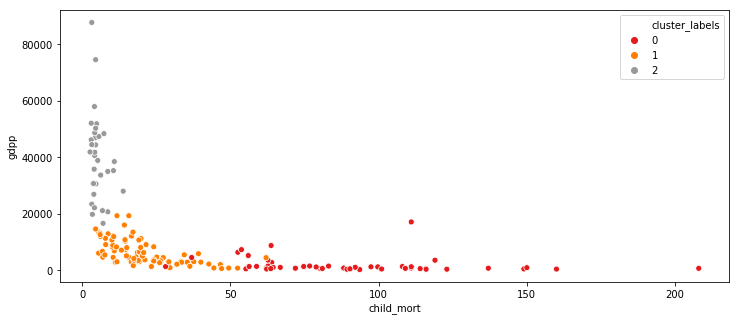

In [52]:
# Visualizing the plot for child_mort and gdpp in a scatter plot by cluster_id
plt.figure(figsize=(12,5))
sns.scatterplot(x='child_mort',y='gdpp',hue='cluster_labels',legend='full',palette="Set1",data=df_clustered)

  Data Interpretation - Features & Clusters  
- Higher gdpp and income in Cluster 2 suggests that Cluster 2 is for developed countries
- Moderate gdpp and income in Cluster 1 suggests that Cluster 1 is for developing countries
- Higher child_mort and low gdpp and income in Cluster 0 suggests that Cluster 0 is for under-developed countries

In [53]:
df_clustered.drop('cluster_id',axis=1,inplace=True)

<a id="FMC"></a>
### 6.2 Feature Means in Cluster

In [54]:
clu_cm = pd.DataFrame(df_clustered.groupby(["cluster_labels"]).child_mort.mean())
clu_exp = pd.DataFrame(df_clustered.groupby(["cluster_labels"]).exports.mean())
clu_hlt = pd.DataFrame(df_clustered.groupby(["cluster_labels"]).health.mean())
clu_imp = pd.DataFrame(df_clustered.groupby(["cluster_labels"]).imports.mean())
clu_inc = pd.DataFrame(df_clustered.groupby(["cluster_labels"]).income.mean())
clu_inf = pd.DataFrame(df_clustered.groupby(["cluster_labels"]).inflation.mean())
clu_lfe = pd.DataFrame(df_clustered.groupby(["cluster_labels"]).life_expec.mean())
clu_fer = pd.DataFrame(df_clustered.groupby(["cluster_labels"]).total_fer.mean())
clu_gdpp = pd.DataFrame(df_clustered.groupby(["cluster_labels"]).gdpp.mean())

In [55]:
df = pd.concat([pd.Series([0,1,2]),clu_cm,clu_exp,clu_hlt,clu_imp,clu_inc,clu_inf,clu_lfe,clu_fer,clu_gdpp], axis=1)
df

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,89.602041,855.341549,111.580659,809.356369,3878.632653,9.872551,59.510204,4.873265,1870.408163
1,1,20.960000,2855.064020,401.962147,2968.416500,12510.750000,7.700487,73.098750,2.284000,6415.425000
2,2,5.270588,19046.767647,3748.694118,16935.358824,40538.235294,2.506412,79.850000,1.767941,39291.176471


  Data Interpretation of Feature Means in Clusters  
- child_mort, inflation and total_fer is highly loaded in Cluster 0. Signifying this cluster is of under-developed countries.
- All variables are in the mid-range in Cluster 1. Signifying this cluster is for developing countries.
- gdpp, income, exports, imports, health and life_expec is highly loaded in Cluster 2. Signifying this cluster is of developed countries.

**Inference: Cluster 0 is in dire-need of aid**  

<a id="CDNA"></a>
### 6.3 Countries in Dire-Need of Aid

In [56]:
#Applying concept of binning by filtering based on means within cluster
fin=df_clustered[df_clustered['child_mort']>=clu_cm.iloc[0][0]]
fin=fin[fin['gdpp']<=clu_gdpp.iloc[0][0]]
fin=fin[fin['income']<=clu_inc.iloc[0][0]]
fin=fin[fin['inflation']>=clu_inf.iloc[0][0]]
fin=fin[fin['health']<=clu_hlt.iloc[0][0]]
fin=fin[fin['total_fer']>=clu_fer.iloc[0][0]]
fin=fin[fin['exports']<=clu_exp.iloc[0][0]]
fin=fin[fin['imports']<=clu_imp.iloc[0][0]]
fin=fin[fin['life_expec']<=clu_lfe.iloc[0][0]]
fin.sort_values(by='gdpp',ascending=True)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.3,57.7,6.26,231,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.8,57.5,6.54,334,0
129,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.2,55.0,5.20,399,0
93,Malawi,90.5,104.6520,30.2481,160.191,1030,12.1,53.1,5.31,459,0
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.1,58.0,5.34,648,0


**List of Countries in Dire-Need of Aid**  
 1. Burundi
 2. Congo, Dem. Rep.
 3. Sierra Leone
 4. Malawi
 5. Guinea
